## Week 10 Independent Lab: Data Reduction      
By: Dean Wilson  
Course: BGEN 632: Graduate Introduction to Python  
Date: 20250507  

### Modules Utilized

In [11]:
# load modules
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split

# for displaying the tree
import graphviz
from six import StringIO
from IPython.display import Image, display
import pydotplus

### Directory and Data

In [12]:
# set working directory
os.chdir("C:\\Users\\deanb\\OneDrive\\Desktop\\Python Graduate Class\\Week10\\week10labs-main\\data")  # change this to your filepath
os.getcwd()  # confirm change

'C:\\Users\\deanb\\OneDrive\\Desktop\\Python Graduate Class\\Week10\\week10labs-main\\data'

In [13]:
# load data
hosp_df = pd.read_table("calihospital.txt", sep = '\t')

hosp_df

,HospitalID,Name,Zip,Website,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,...,AvlBeds,Work_ID,LastName,FirstName,Gender,PositionID,PositionTitle,Compensation,MaxTerm,StartDate
0,45740,Mammoth Hospital,93546-0660,www.mammothhospital.com,District,Small/Rural,Charity,327.0,1.355202e+05,2.052343e+07,...,15,721586,Web,David,M,4,Safety Inspection Member,23987,2,1/1/2012
1,12145,Victor Valley Community Hospital,92392,www.vvch.org,Non Profit,Small/Rural,Charity,345.0,1.361567e+05,3.344754e+07,...,99,756481,Rodriguez,Jose,M,1,Regional Representative,46978,4,1/1/2009
2,25667,Pioneers Memorial Hospital,92227,www.pmhd.org,District,Small/Rural,Charity,601.2,1.970943e+05,3.725418e+07,...,107,926378,Adamson,David,M,1,Regional Representative,46978,4,1/1/2012
3,46996,Ridgecrest Regional Hospital,93555,www.rrh.org,Non Profit,Small/Rural,Charity,400.0,1.391704e+05,2.338557e+07,...,55,856720,Roberts,Melissa,F,4,Safety Inspection Member,23987,2,1/1/2009
4,37393,Barstow Community Hospital,92311,www.barstowhospital.com,Investor,Small/Rural,Charity,262.0,1.167978e+05,1.368450e+07,...,42,909709,Iwata,Akira,M,1,Regional Representative,46978,4,1/1/2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,32930,Scripps Mercy Hospital,92103,www.scrippshealth.org,Non Profit,Teaching,Alumni,2814.0,1.321032e+06,3.791029e+08,...,530,411280,Manin,Emily,F,1,Regional Representative,46978,4,1/1/2011
57,31032,Long Beach Memorial & Miller Children's Hospital,90806,www.memorialcare.org,Non Profit,Teaching,Alumni,5218.0,1.187022e+06,2.912481e+08,...,462,310431,Dong,HongWei,F,4,Safety Inspection Member,23987,2,1/1/2012
58,22460,Stanford Hospital & Clinics,94305,stanfordhospital.org,Non Profit,Teaching,Alumni,6392.0,4.333934e+06,9.289621e+08,...,445,380668,Smith,Mary,F,4,Safety Inspection Member,23987,2,1/1/2012
59,33192,California Pacific Medical Center - Pacific Ca...,94115,www.cpmc.org,Non Profit,Teaching,Alumni,1565.1,2.736281e+06,6.337903e+08,...,730,308150,Fourier,Craig,M,1,Regional Representative,46978,4,1/1/2011


### Establishing Numerical DataFrame

In [14]:
numerical_df = (hosp_df
                .filter(['NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc', 'AvlBeds'])
          )

numerical_df.corr()

,NoFTE,NetPatRev,InOperExp,OutOperExp,OperRev,OperInc,AvlBeds
NoFTE,1.000000,0.903827,0.938051,0.880295,0.896387,-0.072314,0.881333
NetPatRev,0.903827,1.000000,0.979109,0.960232,0.998765,0.220149,0.887727
InOperExp,0.938051,0.979109,1.000000,0.935863,0.979817,0.071781,0.925521
OutOperExp,0.880295,0.960232,0.935863,1.000000,0.955239,0.056218,0.826892
OperRev,0.896387,0.998765,0.979817,0.955239,1.000000,0.234270,0.890018
OperInc,-0.072314,0.220149,0.071781,0.056218,0.234270,1.000000,0.041857
AvlBeds,0.881333,0.887727,0.925521,0.826892,0.890018,0.041857,1.000000


### Creating Trees

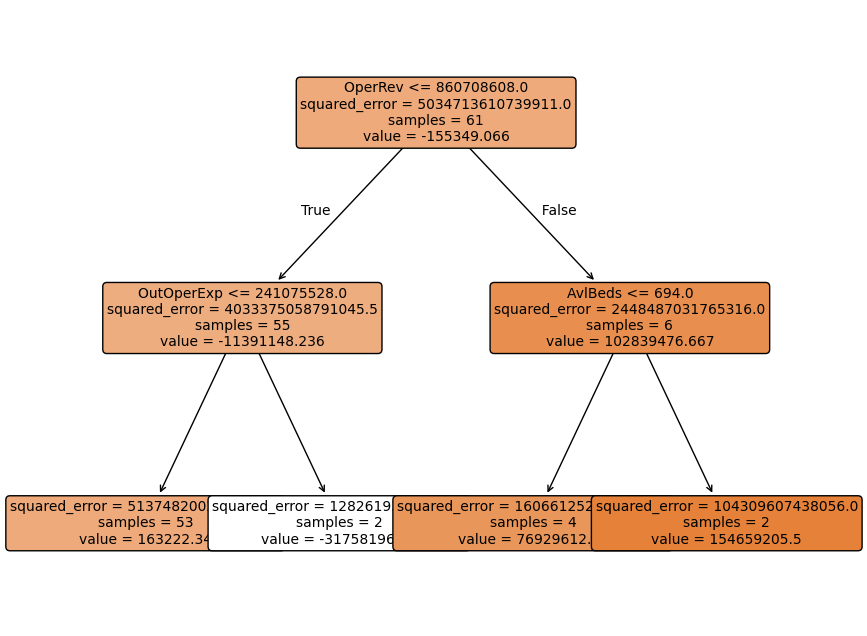

In [15]:
# subset numerical variables
hosp_sub_1 = (hosp_df
             .filter(['OutOperExp', 'OperRev', 'AvlBeds'])
            )

# subset categorical variables 
hosp_dummy = (hosp_df
              .filter(['TypeControl', 'Teaching', 'DonorType'])
             )

# convert categorical variable into dummy/indicator variables - we will use this DataFrame for several tree builds
dummies = pd.get_dummies(hosp_dummy, drop_first=True)

# merge numerical and dummy-coded categorical variables
tree_data_1 = pd.merge(hosp_sub_1, dummies, left_index=True, right_index=True)

# create the tree - note this is a REGRESSION tree
tree_1 = tree.DecisionTreeRegressor(max_depth=2).fit(tree_data_1, hosp_df['OperInc'])

# create labels for plot
col_names1 = list(tree_data_1.columns.values)

# create plot
plt.figure(figsize=(10,8))  # set plot size (denoted in inches)
tree.plot_tree(tree_1, feature_names=col_names1, filled=True, rounded=True, fontsize=10)
plt.show()

### Regression Tree 1 Findings
* The root node splits the results by if Operating Revenue was less than  860,708,608.0 (true or false). This decision is made because it reduces the error in predicting operating income, which is highly variant due to the MSE being over 4 quadrillion and a predicted value of approximately -$155,349.07 (this is the indicated net loss when no splits are applied)
* If the Operation Revenue was less that 650,708,608.0, than the Outpatient Operating Expense was also lower with a sample size of 55 out of 61. This suggests that the hospitals with lower outpaitent costs also tend to have lower operating revenue, leading to lower Operation Income.
* If the Operation Revenue was greater than 650,708,608.0, the hospitals had fewer than 694 beds. While 694 is quite large compared to the averaged bed count of 195, this suggests that the highest revenue hospitals may not be the largest in bed capacity. This indicates that the higher-revenue hospitals may operate more efficiently and have a higher patient turnover, generating more Operation Income.

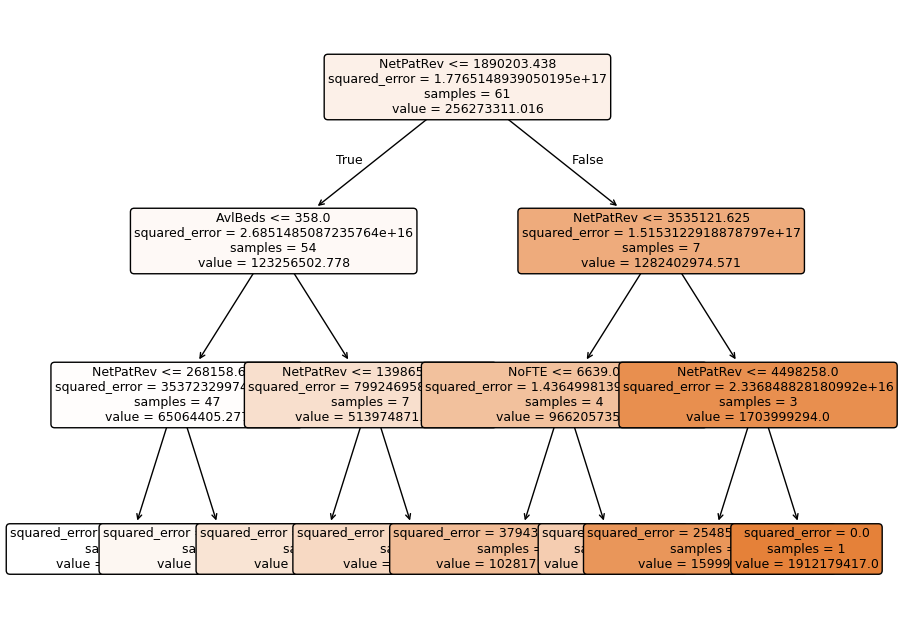

In [19]:
# subset numerical variables
hosp_sub_2 = (hosp_df
            .filter(['NoFTE', 'NetPatRev', 'OutOperExp', 'AvlBeds'])
           )

# merge numerical and dummy-coded categorical variables
tree_data_2 = pd.merge(hosp_sub_2, dummies, left_index=True, right_index=True)

# create tree - note this is a REGRESSION tree
tree_2 = tree.DecisionTreeRegressor(max_depth=3).fit(tree_data_2,hosp_df['OperRev'])

# get labels for plot
col_names2 = list(tree_data_2.columns.values)

# create plot
plt.figure(figsize=(10,8))  # set plot size (denoted in inches)
tree.plot_tree(tree_2, feature_names=col_names2, filled=True, rounded=True, fontsize=9)
plt.show()

### Regression Tree 2 Findings
* The root node splits the results by if Net Patient Revenue was less than 1,890,203.438 (true or false) given it's importance as the most imortant initial preictor of Operational Revenue. The squared error is quite large, indicating that the predictions at the node are very spread out and that there is a predicted Operating Revenue value of 256,273,311  
* If the Net Patient Revenue was less than 1,890,203.438, than the available Beds were likely to be less than 358 (which is still a large amount since the average available bed space is 195). The sample size for this was 54 out of 61. This could indicate that the fewer bed spaces the hospitals have, the less operation revenue they will generate (this could be due to efficiency, or even how populated the area is that the hospital is located in)  
* If Net PatRev was greater than 1,890,203.438, than NoFTE had 4 samples of being less than 6639 (which is quite high since the average NoFTE is 1350). This could indicate that Hospitals with more Full Time Employees are likely to have higher Operating Revenues  
* The Regression Tree did not reflect anything for OutOperExp, indicating that it wasn't a critical component when compared to the others.  

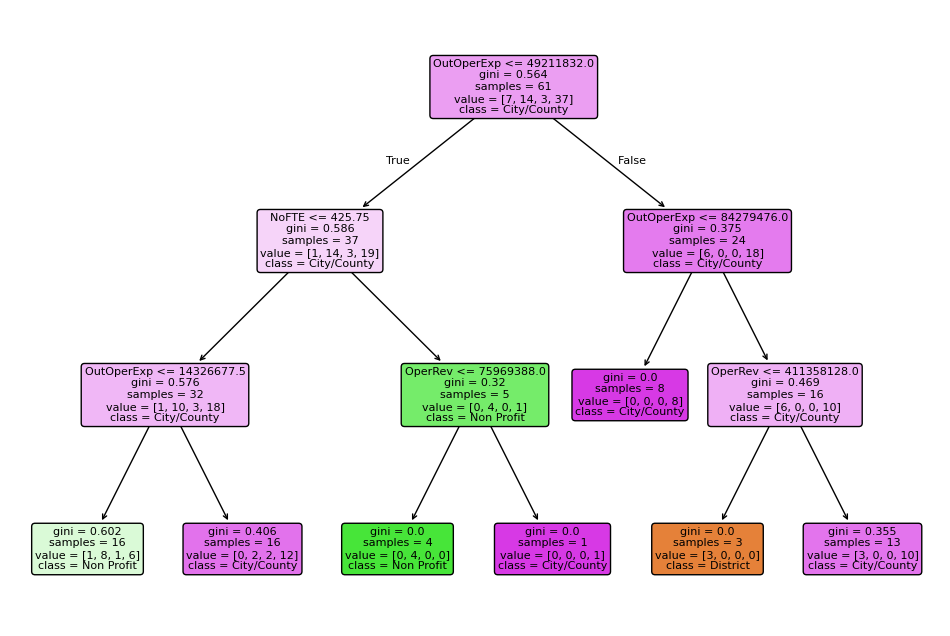

In [20]:
# subset numerical variables
hosp_sub_3 = (hosp_df
.filter(['NoFTE', 'OperRev', 'OutOperExp'])
)

# subset categorical variables other than TypeControl
hosp_dummy2 = (hosp_df
               .filter(['Teaching'])
              )

# convert categorical to dummy 
dummies2 = pd.get_dummies(hosp_dummy2,drop_first=True)

# merge numerical and dummy-coded categorical variables
tree_data_3 = pd.merge(hosp_sub_3, dummies2, left_index=True, right_index=True)

# create tree - note this is a CLASSIFICATION tree
tree_3 = tree.DecisionTreeClassifier(max_depth=3).fit(tree_data_3, hosp_df['TypeControl'])

# create labels for plot
col_names3 = list(tree_data_3.columns.values)
classnames1 = list(hosp_df.TypeControl.unique())

# create plot
plt.figure(figsize=(12,8))  # set plot size (denoted in inches)
tree.plot_tree(tree_3, feature_names=col_names3, class_names=classnames1, filled=True, rounded=True, fontsize=8)
plt.show()

### Classification Tree 1 Findings
* The root node of this Classification Tree is split between true or false for the following; Outpatient Operating Expense <= 49,211,832. This node is determined to be the most important inital predictor when it comes to Type Control. The dominant class in this node is City/County and the gini is .564, indicating a pretty mixed categories of hospital types.
* If Outpatient Operating Expense was less than 49,211,832; then the tree splits again for Number of Full Time Employees <= 425.75. If True, Outpatient Operating Expense is split again by <= 14,326,677.5. If True, than the tree shows that the dominating class is Non-Profit, which indicates that Non-Profits tend to generate less revenue, likely due to lower Outpatient Operating Expenses. If Number of Full Time Employees <= 425.75 is false, than the the Operational Revenue is split again by the statement <= 75,969,388. If this is True, it is dominated by Non Profit, again indicating Non Profits tend to charge less and if false, than it is dominated by city/county indicating they tend to charge more. 
* If Outpatient Operating Expense was greater than 49,211,832; then it indicates that City County and District tend to have large Outpatient Operating Expenses likely due to the wage rates of the local area and potentially the issue of large populations not paying due to being uninsured, causing hospitals to raise their prices for insured patients.

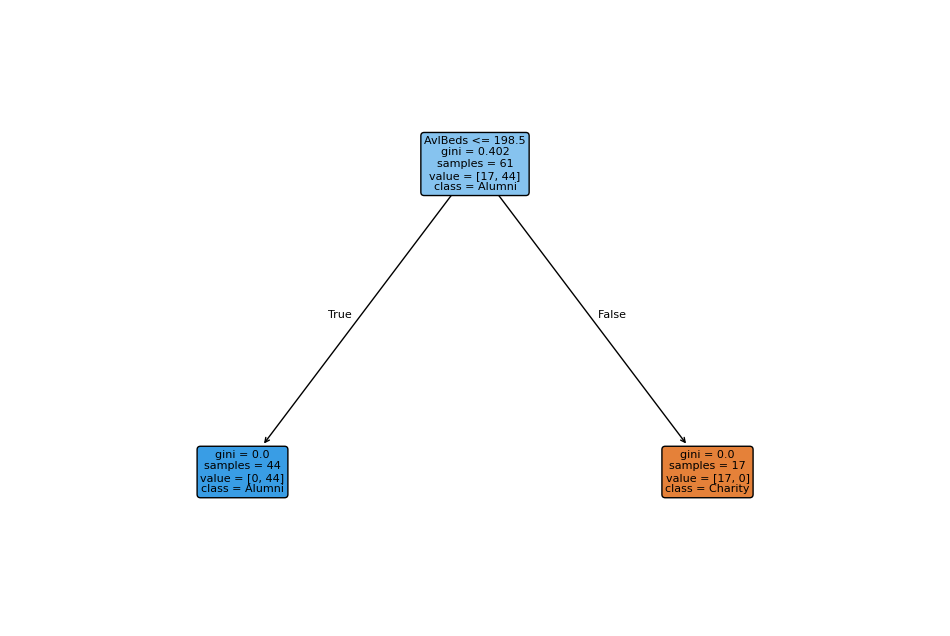

In [21]:
# subset numerical data
hosp_sub_4 = (hosp_df
             .filter(['NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperInc', 'OperRev', 'AvlBeds'])
            )

# subset categorical variables other than DonorType
hosp_dummy3 = (hosp_df
               .filter(['TypeControl'])
              )

# convert categorical variable into dummy/indicator variables
dummies3 = pd.get_dummies(hosp_dummy3, drop_first=True)

# merge numerical and dummy-coded categorical variables
tree_data_4 = pd.merge(hosp_sub_4, dummies3, left_index=True, right_index=True)

# create tree - note this is a CLASSIFICATION tree
tree_4 = tree.DecisionTreeClassifier(max_depth=3).fit(tree_data_4, hosp_df['DonorType'])

# create labels for plot
col_names4 = list(tree_data_4.columns.values)
classnames2 = list(hosp_df.DonorType.unique())

# create plot
plt.figure(figsize=(12,8))  # set plot size (denoted in inches)
tree.plot_tree(tree_4, feature_names=col_names4, class_names=classnames2, filled=True, rounded=True, fontsize=8)
plt.show()

### Classification Tree 2 Findings
* The root node of this classification tree is Available Beds, indicating it as the most prominant predictor when it comes to Donor Type. It is split by the determining factor of AvlBeds <= 198.5, resulting in a perfect split between Alumni and Charity. If this statement is true, then the Alumni class is the only class found. This could be due to the hospitals being smaller, forcing a stronger community and permanent bond with their alumni's. Small rural areas tend to be more supportive for their local communities when compared to large cities.
* If the Available Beds were greater than 198.5, then the only Donor Type is Charity. This is likely due to the hospitals being much larger and having a large scope of recruting funds from charitable people. It would be much easier for San Diego hospitals to acrue donations than a hospital in Hemet California. 

### Favorite Model
* I really like the Classification Tree's overall, but the second classification tree was my favorite (Breaking down donor type through available bed space). I believe it really captures the social differences that smaller communities have compared to larger communities. The smaller communities are likely to support eachother (Alumni's donating their personal funds) vs cities that have to utilize charities (that could be national level charities) to acrue donations. 

### References
* OpenAI. (2025, May 7). Chat with ChatGPT: Hospital cost-shifting and unpaid bills [Large language model]. ChatGPT. https://chatgpt.com/share/681c30f2-8da8-8001-94ad-acb0c2d53960

* Wikipedia contributors. (n.d.). Cost-shifting. Wikipedia. Retrieved May 7, 2025, from https://en.wikipedia.org/wiki/Cost-shifting